#Advertising Sales Channel Prediction


# 1.Exploring the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 5)

#2 EDA

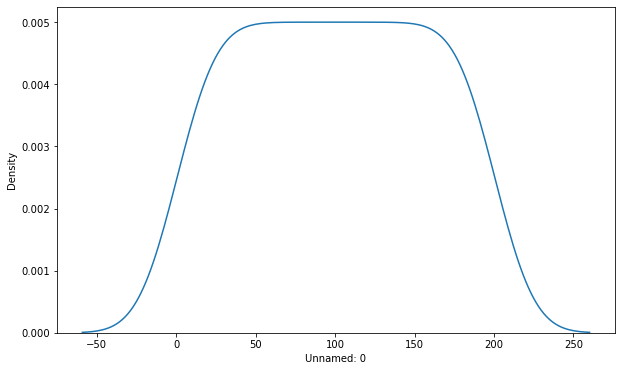

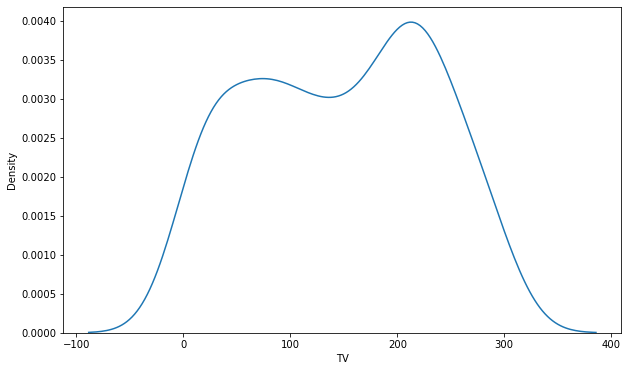

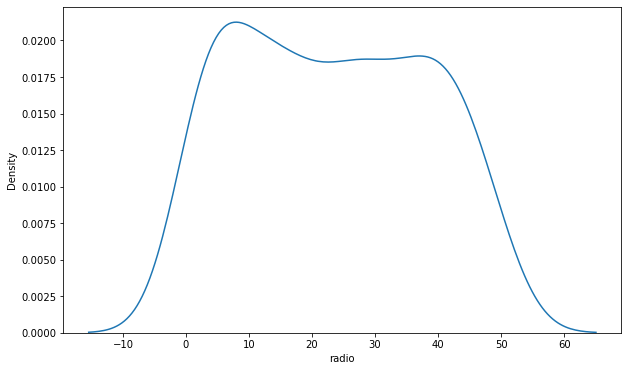

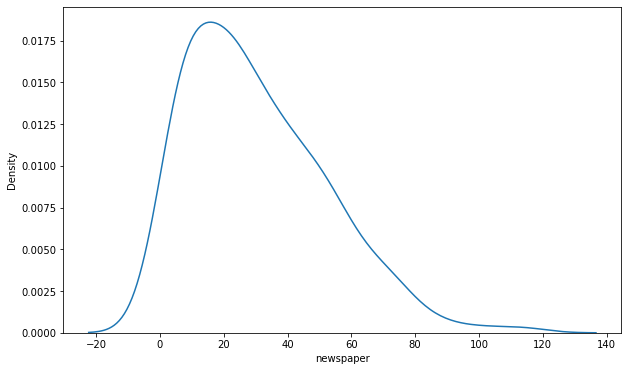

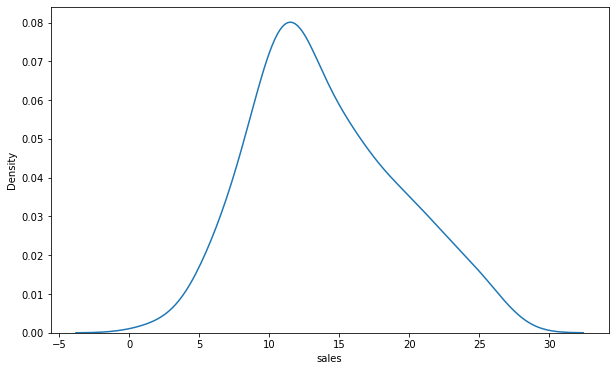

In [6]:
for i in df.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df[i])

Inference: All the data are normally distributed except Newspaper column.

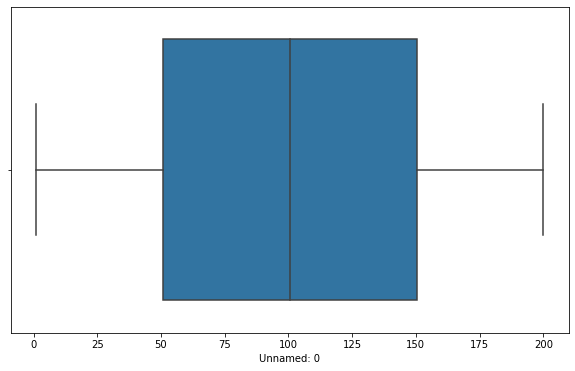

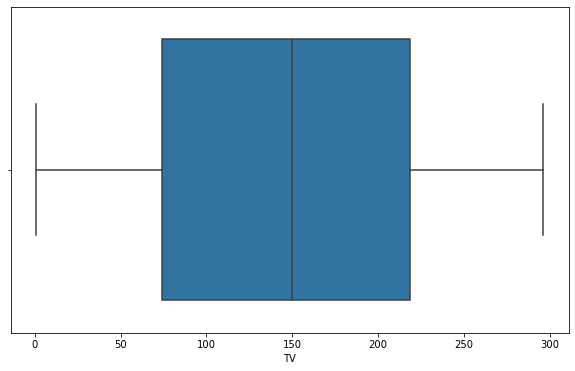

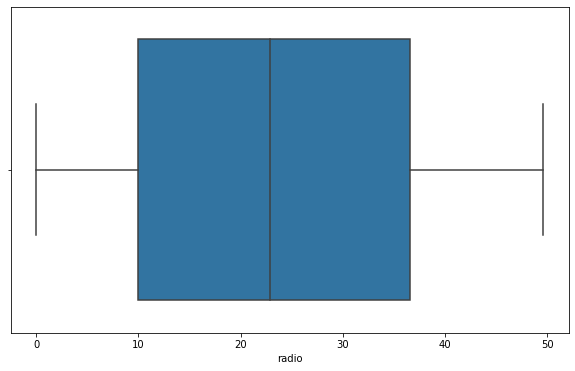

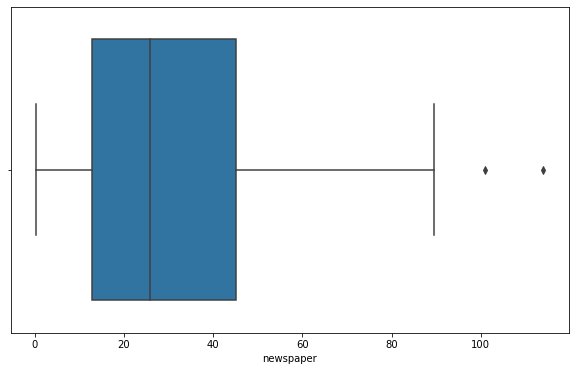

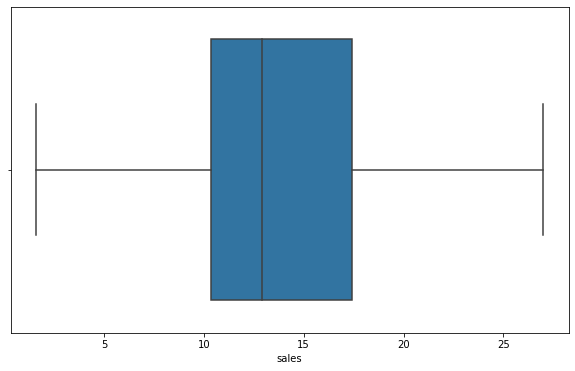

In [9]:
#1.Using box plot to find if any outliers present
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])



Inference: There are few outliers present in Newspaper column.

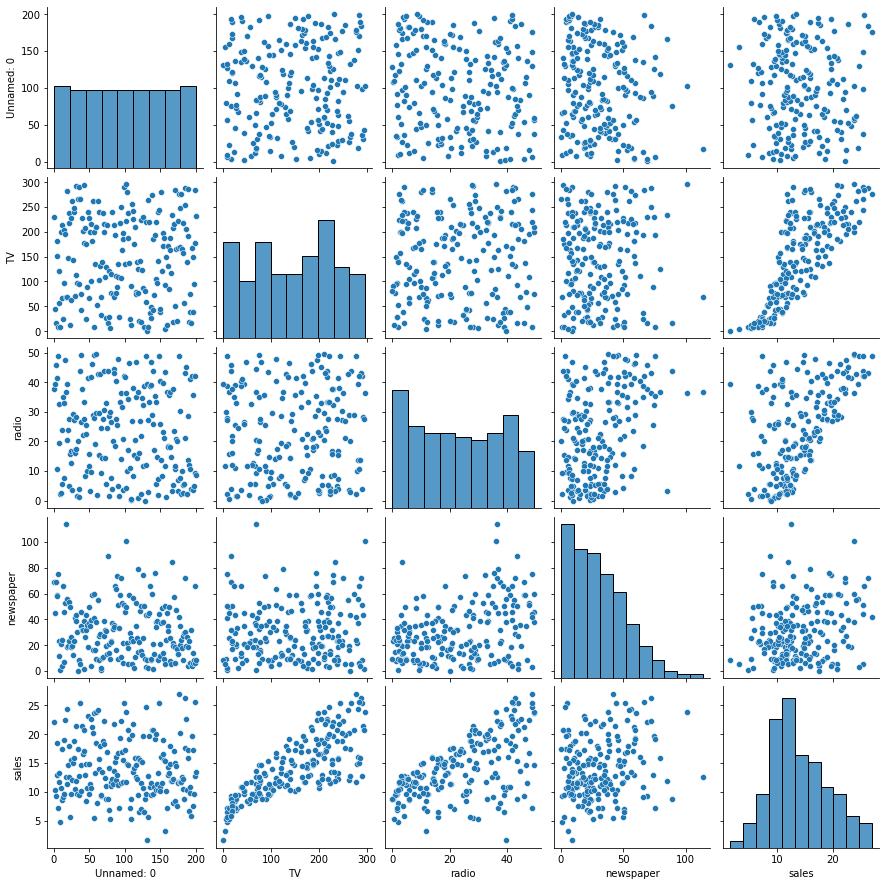

In [10]:
sns.pairplot(df)

#3.Using boxplot to find the column relationship with dependent variable

<AxesSubplot:>

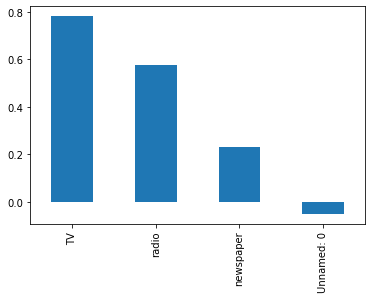

In [12]:
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar')

Inference: Advertisement on the TV gives more impact on sales.

4.using heat map to find the relationship between the columns

<AxesSubplot:>

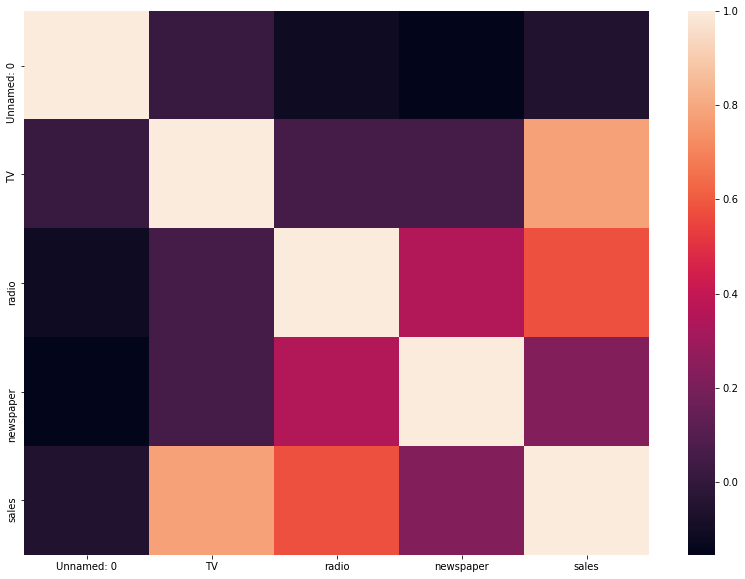

In [13]:
df_corr=df.corr()
plt.figure(figsize=[14,10])
sns.heatmap(df_corr)

Inference: Ad in TV increases the sale than radio or newspaper.

TV>Radio>Newspaper

In [14]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


# 3.Feature Engineering

1.Checking for null values

In [17]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


INFERENCE: No null values are present in data.

In [18]:
#2.Skewness and outlier removal 
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

<AxesSubplot:xlabel='newspaper'>

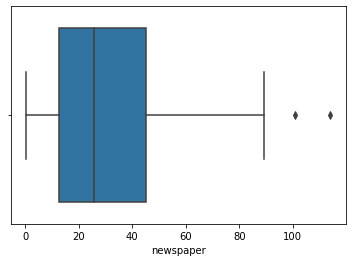

In [19]:
sns.boxplot(df['newspaper'])

Inference: The skewness is highly present in newspaper data because of the outlier.
    
    So replacing the Outlier with the 75th percentile value.

In [20]:
#75th percentile value is 45
df["newspaper"] = np.where(df["newspaper"] >85, 45,df['newspaper'])

Replacing the outlier value with 75th percentile value

In [21]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.571479
sales         0.407571
dtype: float64

Outlier removed

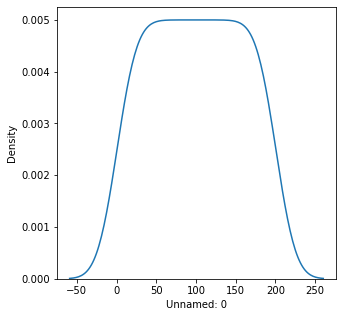

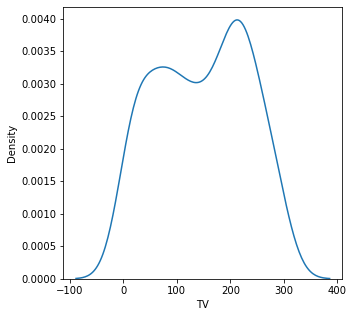

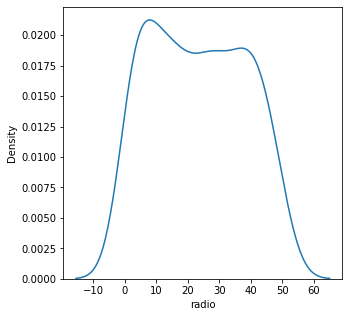

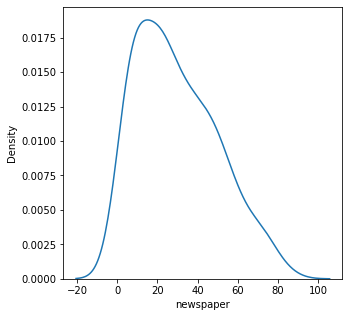

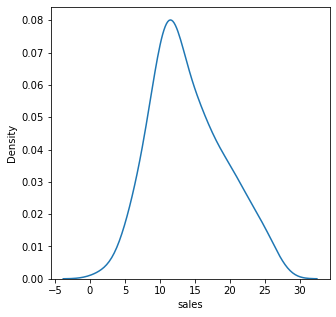

In [23]:
for i in df.columns:
  plt.figure(figsize=[5,5])
  sns.kdeplot(df[i])

Now skewness is reduced

3.checking for the linear relationship with dependent variable

<AxesSubplot:xlabel='sales', ylabel='TV'>

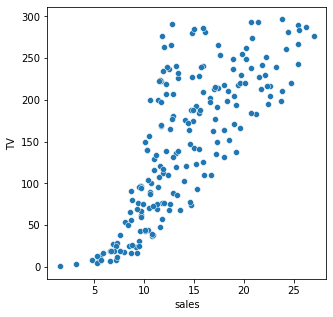

In [24]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='sales',y='TV',data=df)

There is a linear relationship between Sales and TV

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

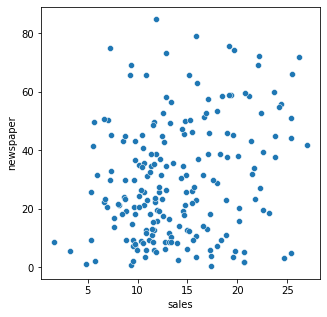

In [25]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='sales',y='newspaper',data=df)

Inference : there is no linear relationship between Sales and Newspaper.

<AxesSubplot:xlabel='sales', ylabel='radio'>

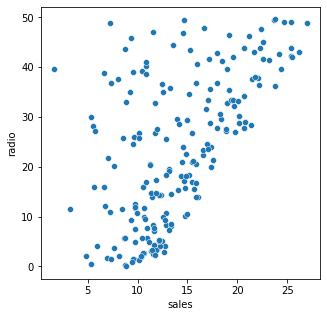

In [26]:
plt.figure(figsize=[5,5])
sns.scatterplot(x='sales',y='radio',data=df)

Inference: There is a not much of linear relationship between Sales and Radio.

# 4. Model Construction

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Test Train split

In [28]:
from sklearn.model_selection import train_test_split

x= df.drop(columns='sales')
y= df['sales']

FINDING BEST RANDOM STATE for linear regression

In [29]:
from sklearn.metrics import r2_score
d=5
lm = LinearRegression(fit_intercept=True, normalize=True)
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 0.050562296717845734
least value 0 0.050562296717845734
1 0.004968759756784125
least value 1 0.004968759756784125
2 0.16354621972465722
3 -0.018745961026745084
least value 3 -0.018745961026745084
4 -0.016721969101327172
5 -0.0029900577728094735
6 -0.028631557539087304
least value 6 -0.028631557539087304
7 -0.016254287095948783
8 0.06277478635325828
9 -0.035896558708566007
least value 9 -0.035896558708566007
10 0.0863557371430137
11 0.06516709966040635
12 -0.02068385247959359
13 -0.04440212212354899
least value 13 -0.04440212212354899
14 0.05382156546092576
15 -0.010694458648616734
16 -0.02538366171438855
17 0.08665766161679167
18 0.03585625050084995
19 -0.01083027972977102
20 -0.007304132424553855
21 -0.025377149693041834
22 -0.028499738822479692
23 -0.017795075957429574
24 -0.010363249107903982
25 0.02702762951638915
26 0.03610568433446015
27 -0.007116043693650487
28 0.01605387049130169
29 -0.0224000981935506
30 -0.01135965781729631
31 -0.03999793639764626
32 0.140951665329491
33 0.

The best Random state is 92 for Linear Regression

2.Scaling the Data

In [30]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [31]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [32]:
x_train.describe()

,0,1,2,3
count,160.000000,160.000000,160.000000,160.000000
mean,0.496420,0.508934,0.473783,0.354645
std,0.294982,0.293395,0.303474,0.241746
min,0.000000,0.000000,0.000000,0.000000
25%,0.239950,0.252114,0.196247,0.147337
50%,0.505025,0.518600,0.479716,0.304734
75%,0.750000,0.756679,0.740872,0.528994
max,1.000000,1.000000,1.000000,1.000000


linear regression model

In [33]:
lm = LinearRegression(fit_intercept=True, normalize=True)
lm.fit(x_train, y_train)

lr_pred=lm.predict(x_test)
print(lm.score(x_test, y_test))
print("mean square error is : ",mean_squared_error(lm.predict(x_test), y_test))
print("                ")
print("r2 score  :   ",r2_score(y_test, lr_pred))
cv_score=cross_val_score(lm, x, y, cv=10)
cv_mean=cv_score.mean()
print("cv score  :   ",cv_mean)

0.9193238110981081
mean square error is :  2.0680614939299877
                
r2 score  :    0.9193238110981081
cv score  :    0.8825179402532177


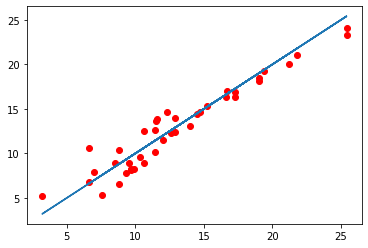

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x=y_test,y=lr_pred,color='r')
plt.plot(y_test,y_test)

Lasso Regression

In [35]:
lasm = Lasso(fit_intercept=True, normalize=True, alpha=0.5)
lasm.fit(x_train, y_train)

Lasso(alpha=0.5, normalize=True)

In [36]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [37]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

print("mean square error is : ",mean_squared_error(ls.predict(x_test), y_test))

lss=r2_score(y_test,pred_ls)
print("r2 score  :   ",lss)

cv_score=cross_val_score(ls, x, y, cv=10)
cv_mean=cv_score.mean()
print("cv score  :   ",cv_mean)

mean square error is :  2.06109703540571
r2 score  :    0.9195954983632852
cv score  :    0.8825413254300123


Random forest regressor

In [38]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [39]:
rf=RandomForestRegressor(criterion= 'mae', max_features= 'auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

print("mean square error is : ",mean_squared_error(ls.predict(x_test), y_test))

rfs=r2_score(y_test,pred_rf)
print("r2 score  :   ",rfs)

cv_score=cross_val_score(rf, x, y, cv=10)
cv_mean=cv_score.mean()
print("cv score  :   ",cv_mean)

mean square error is :  2.06109703540571
r2 score  :    0.9769432657573309
cv score  :    0.9770854294809567


We are getting R2 score and cv score as 0.97 and 0.97 respectively.This shows our model is performing best in Random Forest Regressor.

In [40]:
import joblib
joblib.dump(rf,"final model.pkl")

['final model.pkl']